##Read the dataset

In [ ]:
import pandas as pd
import numpy as np
Final_df = pd.read_csv('data-preprocessed.csv')

##Stratified K-fold cross-validation with RandomForestClassifier



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

accuracy = []

X = Final_df.drop(['Y'],axis=1)
y = Final_df['Y']

sk_fold = StratifiedKFold()
skf = sk_fold.split(X,y)

for train_index, test_index in skf:
  print("Train:", train_index, "Validation:", test_index)
  Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
  ys_train, ys_test = y.iloc[train_index], y.iloc[test_index]
  clf = RandomForestClassifier()
  clf.fit(Xs_train, ys_train)
  y_pred = clf.predict(Xs_test)
  scores = accuracy_score(y_pred, ys_test)
  accuracy.append(scores)



print(accuracy)
print(np.array(accuracy).mean())


Train: [ 2306  2307  2308 ... 12076 12077 12078] Validation: [   0    1    2 ... 2591 2596 2600]
Train: [    0     1     2 ... 12076 12077 12078] Validation: [2306 2307 2308 ... 5017 5018 5019]
Train: [    0     1     2 ... 12076 12077 12078] Validation: [4662 4663 4664 ... 7389 7390 7391]
Train: [    0     1     2 ... 12076 12077 12078] Validation: [7136 7137 7138 ... 9680 9681 9682]
Train: [   0    1    2 ... 9680 9681 9682] Validation: [ 9649  9650  9651 ... 12076 12077 12078]
[0.5860927152317881, 0.6891556291390728, 0.6506622516556292, 0.6556291390728477, 0.6865424430641822]
0.653616435632704


##Train Test Split

In [ ]:
X = Final_df.drop(['Y'],axis=1)
y = Final_df['Y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Feature Importance

In [ ]:
#Mutual info classifier
from sklearn.feature_selection import mutual_info_classif
m = (mutual_info_classif(X_train,y_train))

mutual_info = pd.Series(m)
mutual_info.index = X_train.columns

mutual_info = mutual_info.sort_values(ascending=False)

In [ ]:
len(m)  

60

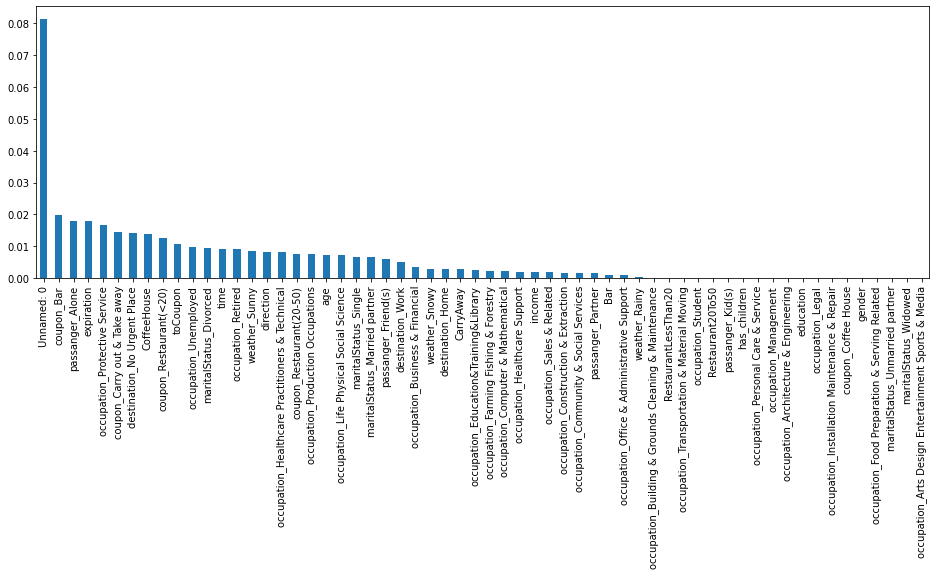

In [ ]:
ax = mutual_info.plot.bar(figsize=(16,5))
figure = ax.get_figure()
figure.savefig('Feature importance.png')

##Hyperparameter tuning using 10-fold GridSearchCV on Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [50,100,200,300,400,500]#[int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier(criterion='entropy')

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
predict = rf_Grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))

[[ 682  863]
 [ 255 1824]]
0.6915011037527594
              precision    recall  f1-score   support

           0       0.73      0.44      0.55      1545
           1       0.68      0.88      0.77      2079

    accuracy                           0.69      3624
   macro avg       0.70      0.66      0.66      3624
weighted avg       0.70      0.69      0.67      3624



##Hyperparameter tuning using 10-fold GridSearchSV on K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
k=GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
              cv = 10, verbose=2, n_jobs = 4)

In [ ]:
k.fit(X_train,y_train)
predict = k.predict(X_test)

Fitting 10 folds for each of 98 candidates, totalling 980 fits


In [ ]:
k.best_params_

{'n_neighbors': 31, 'weights': 'distance'}

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))

[[ 679  866]
 [ 524 1555]]
0.6164459161147903
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1545
           1       0.64      0.75      0.69      2079

    accuracy                           0.62      3624
   macro avg       0.60      0.59      0.59      3624
weighted avg       0.61      0.62      0.61      3624



##Hyperparameter tuning using 10-fold GridSearchSV on AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier())

#int(x) for x in np.linspace(start = 10, stop = 50, num = 10)
parameters = {'base_estimator__min_samples_leaf':[5,7],
              'n_estimators':[10,15],
              'learning_rate':[1.0]}

clf = GridSearchCV(abc, parameters,cv=10,scoring='f1',n_jobs=4)
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             n_jobs=4,
             param_grid={'base_estimator__min_samples_leaf': [5, 7],
                         'learning_rate': [1.0], 'n_estimators': [10, 15]},
             scoring='f1')

In [ ]:
clf.best_params_

{'base_estimator__min_samples_leaf': 5,
 'learning_rate': 1.0,
 'n_estimators': 10}

In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[1076  469]
 [ 359 1720]]
0.7715231788079471
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1545
           1       0.79      0.83      0.81      2079

    accuracy                           0.77      3624
   macro avg       0.77      0.76      0.76      3624
weighted avg       0.77      0.77      0.77      3624

